# Example 4.2: Transmission of vibration - MDOF




### Define the system model and load


In [237]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import linalg as spla

Phi_1=[0.7,1,0.7]
Phi_2=[1.0,0,-1.0]
Phi_3=[1.0,-0.3,1.0]

Phi=np.column_stack((Phi_1,Phi_2,Phi_3))

print(np.shape(Phi))

f=[0.15,0.2,0.3]

omega_n=2*np.pi*np.array(f)

xi=[0.02,0.02,0.02]

omega_axis=np.linspace(0.01,5,500)

s=.4
omega_m=1
S0=np.exp(-(omega_axis-omega_m)**2/s**2)

Sx=np.zeros((3,3,len(omega_axis)))
a=1;
for i in np.arange(3):
    if i==1: Sx[i,i,:]=S0*a
    else: Sx[i,i,:]=S0
        

(3, 3)


### Load cross-spectral density matrix

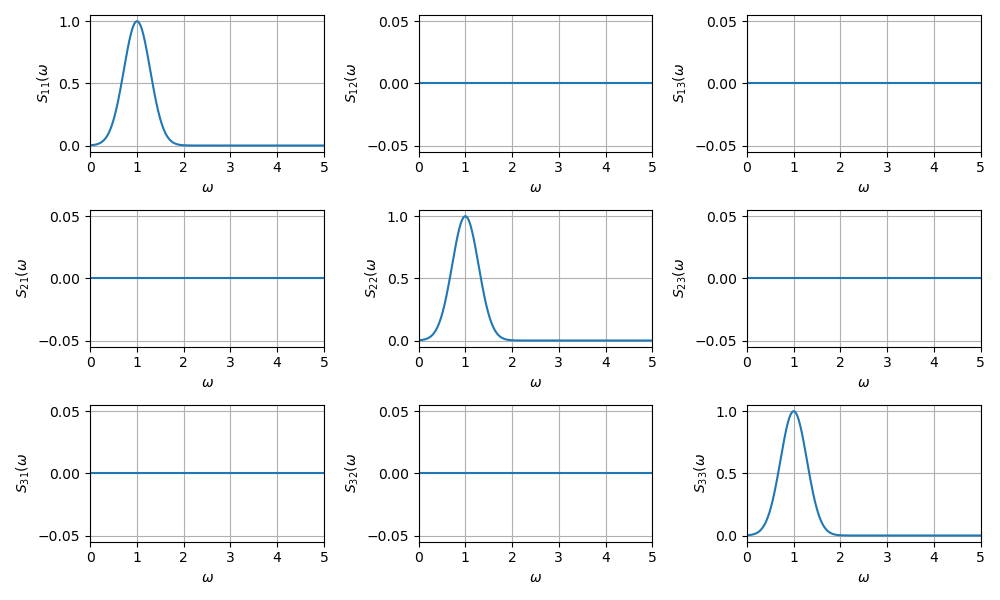

In [231]:

# Plot
fig, axs = plt.subplots(3, 3,figsize=(10, 6))

for i in np.arange(3):
    for j in np.arange(3):
        axs[i,j].plot(omega_axis,Sx[i,j,:])
        axs[i,j].set_xlabel(r'$\omega$')
        axs[i,j].set_ylabel(r'$S_{' + str(i+1) + str(j+1) + '} (\omega$')
        axs[i,j].set_xlim(0,5)
        axs[i,j].grid(True)

plt.tight_layout()

### Modal load cross-spectral density matrix

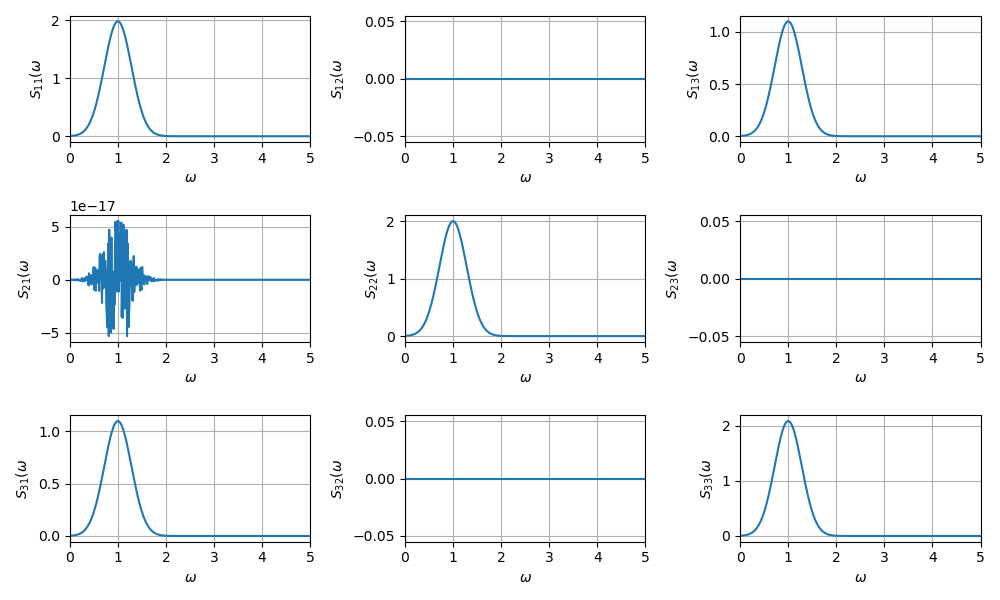

In [232]:
Sx_modal=np.zeros((3,3,len(omega_axis)))
for k in np.arange(len(omega_axis)):
    Sx_modal[:,:,k]=Phi.T @ Sx[:,:,k] @ Phi

# Plot
fig, axs = plt.subplots(3, 3,figsize=(10, 6))

for i in np.arange(3):
    for j in np.arange(3):
        axs[i,j].plot(omega_axis,Sx_modal[i,j,:])
        axs[i,j].set_xlabel(r'$\omega$')
        axs[i,j].set_ylabel(r'$S_{' + str(i+1) + str(j+1) + '} (\omega$')
        axs[i,j].set_xlim(0,5)
        axs[i,j].grid(True)

plt.tight_layout()


### Frequency response function

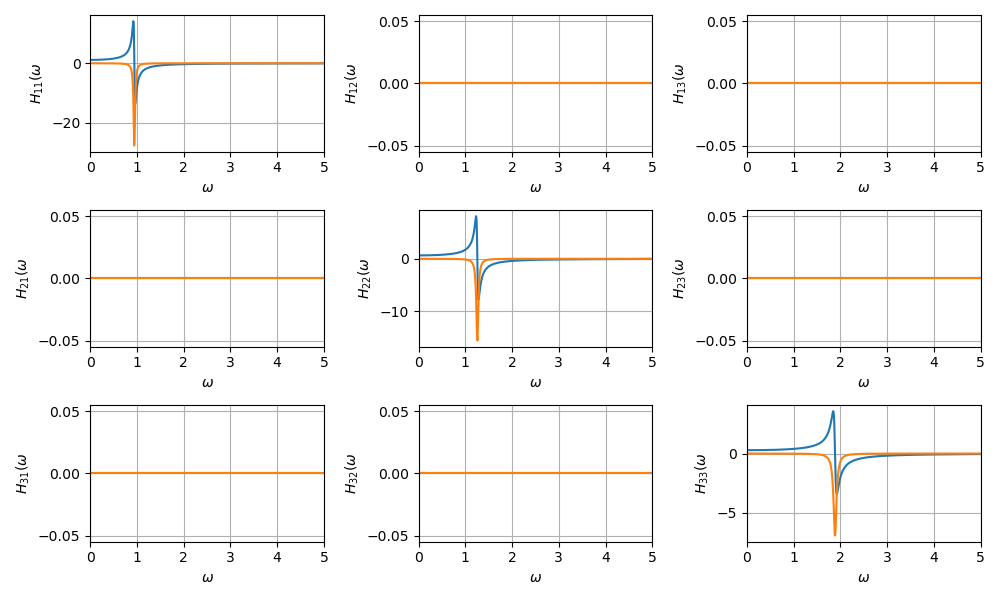

In [233]:
H_modal=np.zeros((3,3,len(omega_axis)),dtype=complex)
for k in np.arange(len(omega_axis)):
    tmp=-omega_axis[k]**2*np.eye(3)+1j*omega_axis[k]*2*np.diag(omega_n)*np.diag(xi)+np.diag(omega_n)**2
    H_modal[:,:,k]=np.linalg.inv(tmp)


# Plot
fig, axs = plt.subplots(3, 3,figsize=(10, 6))

for i in np.arange(3):
    for j in np.arange(3):
        axs[i,j].plot(omega_axis,np.real(H_modal[i,j,:]))
        axs[i,j].plot(omega_axis,np.imag(H_modal[i,j,:]))
        axs[i,j].set_xlabel(r'$\omega$')
        #axs[i,j].set_ylabel(r'$H_{11}$')
        axs[i,j].set_ylabel(r'$H_{' + str(i+1) + str(j+1) + '} (\omega$')
        axs[i,j].set_xlim(0,5)
        axs[i,j].grid(True)

plt.tight_layout()


### Modal response spectrum

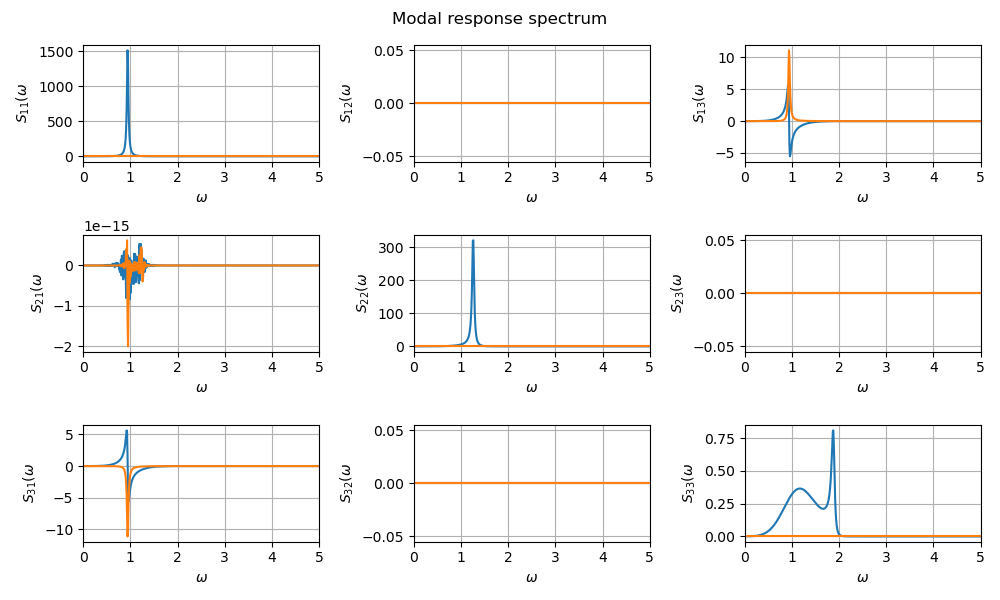

In [234]:
Sz=np.zeros((3,3,len(omega_axis)),dtype=complex)
for k in np.arange(len(omega_axis)):
    Sz[:,:,k]=np.conj(H_modal[:,:,k]) @ Sx_modal[:,:,k] @ H_modal[:,:,k].T


# Plot
fig, axs = plt.subplots(3, 3,figsize=(10, 6))

for i in np.arange(3):
    for j in np.arange(3):
        axs[i,j].plot(omega_axis,np.real(Sz[i,j,:]))
        axs[i,j].plot(omega_axis,np.imag(Sz[i,j,:]))
        axs[i,j].set_xlabel(r'$\omega$')
        axs[i,j].set_ylabel(r'$S_{' + str(i+1) + str(j+1) + '} (\omega$')
        axs[i,j].set_xlim(0,5)
        axs[i,j].grid(True)

fig.suptitle('Modal response spectrum')

plt.tight_layout()


### Displacement response spectrum

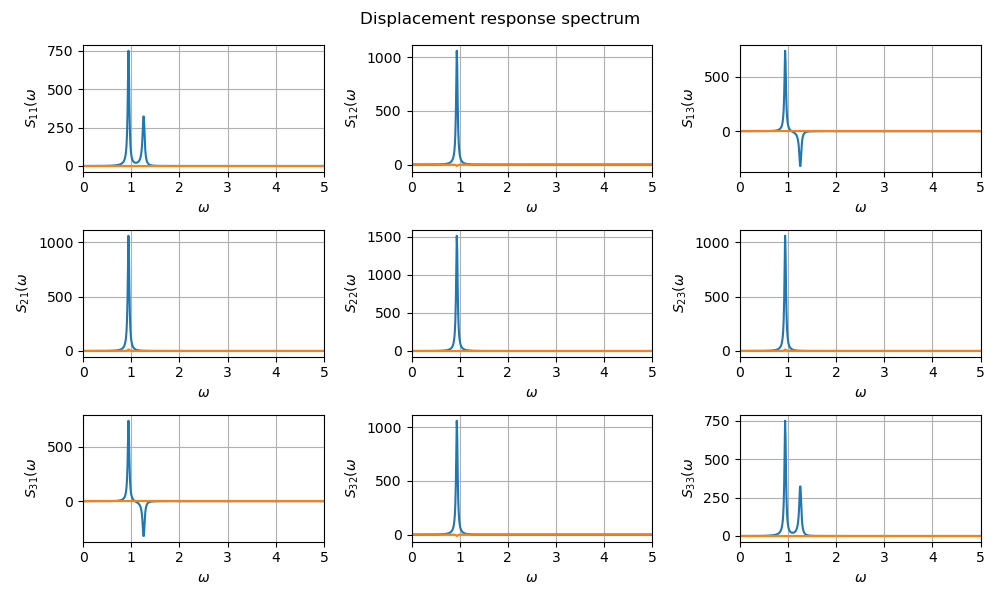

In [235]:

Sy=np.zeros((3,3,len(omega_axis)),dtype=complex)
for k in np.arange(len(omega_axis)):
    Sy[:,:,k]=Phi @ Sz[:,:,k] @ Phi.T


# Plot
fig, axs = plt.subplots(3, 3,figsize=(10, 6))

for i in np.arange(3):
    for j in np.arange(3):
        axs[i,j].plot(omega_axis,np.real(Sy[i,j,:]))
        axs[i,j].plot(omega_axis,np.imag(Sy[i,j,:]))
        axs[i,j].set_xlabel(r'$\omega$')
        axs[i,j].set_ylabel(r'$S_{' + str(i+1) + str(j+1) + '} (\omega$')
        axs[i,j].set_xlim(0,5)
        axs[i,j].grid(True)

fig.suptitle('Displacement response spectrum')

plt.tight_layout()


### Varying the problem parameters

0

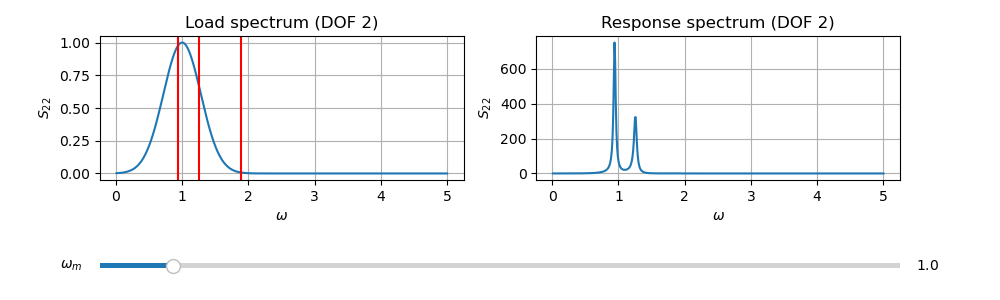

In [236]:
# Enable interactive plots in Jupyter
%matplotlib widget

from scipy.signal import welch
from matplotlib.widgets import Slider

def compute_response(parameter):

    Phi_1=[0.7,1,0.7]
    Phi_2=[1.0,0,-1.0]
    Phi_3=[1.0,-0.3,1.0]

    Phi=np.column_stack((Phi_1,Phi_2,Phi_3))

    f=[0.15,0.2,0.3]    
    omega_n=2*np.pi*np.array(f)
    
    xi=[0.02,0.02,0.02]

    omega_axis=np.linspace(0.01,5,500)

    s=.4
    #omega_m=1
    omega_m=parameter
    S0=np.exp(-(omega_axis-omega_m)**2/s**2)
    
    Sx=np.zeros((3,3,len(omega_axis)))
    a=1;
    #a=parameter
    for i in np.arange(3):
        if i==1: Sx[i,i,:]=S0*a
        else: Sx[i,i,:]=S0

    Sx_modal=np.zeros((3,3,len(omega_axis)))
    for k in np.arange(len(omega_axis)):
        Sx_modal[:,:,k]=Phi.T @ Sx[:,:,k] @ Phi

    H_modal=np.zeros((3,3,len(omega_axis)),dtype=complex)
    for k in np.arange(len(omega_axis)):
        tmp=-omega_axis[k]**2*np.eye(3)+1j*omega_axis[k]*2*np.diag(omega_n)*np.diag(xi)+np.diag(omega_n)**2
        H_modal[:,:,k]=np.linalg.inv(tmp)


    Sz=np.zeros((3,3,len(omega_axis)),dtype=complex)
    for k in np.arange(len(omega_axis)):
        Sz[:,:,k]=np.conj(H_modal[:,:,k]) @ Sx_modal[:,:,k] @ H_modal[:,:,k].T

    Sy=np.zeros((3,3,len(omega_axis)),dtype=complex)
    for k in np.arange(len(omega_axis)):
        Sy[:,:,k]=Phi @ Sz[:,:,k] @ Phi.T

    return Sx,Sy

# Initial load and response spectrum
initial_parameter = 1.0
Sx,Sy = compute_response(initial_parameter)

# Initial plot setup
fig, ax = plt.subplots(1,2,figsize=(10, 3))
plt.subplots_adjust(left=0.1, bottom=0.4)

# Plot the initial response PSD
dynamic_graph_load, = ax[0].plot(omega_axis, np.real(Sx[2,2,:]))
ax[0].set_xlabel(r'$\omega$')
ax[0].set_ylabel('$S_{22}$')
ax[0].set_title('Load spectrum (DOF 2)')
ax[0].grid(True)
ax[0].axvline(omega_n[0],color='r')
ax[0].axvline(omega_n[1],color='r')
ax[0].axvline(omega_n[2],color='r')

# Plot the initial response PSD
dynamic_graph_response, = ax[1].plot(omega_axis, np.real(Sy[2,2,:]))
ax[1].set_xlabel(r'$\omega$')
ax[1].set_ylabel('$S_{22}$')
ax[1].set_title('Response spectrum (DOF 2)')
ax[1].grid(True)
#ax[1].set_yscale('log')
#ax[1].set_ylim(1e-5,1e3)

# Add a slider for adjusting the load PSD
ax_slider = plt.axes([0.1, 0.1, 0.8, 0.03])
slider = Slider(ax_slider, '$\omega_m$ ', 0.1, 10.0, valinit=initial_scale)
#slider = Slider(ax_slider, '$a$ ', 0,10, valinit=initial_scale)

# Update function to recompute and update the plot

def update(val):
    scale = slider.val
    Sx,Sy = compute_response(scale)
    
    dynamic_graph_load.set_ydata( Sx[2,2,:])  # Update the response PSD plot
    dynamic_graph_response.set_ydata( Sy[2,2,:])  # Update the response PSD plot
    fig.canvas.draw_idle()  # Redraw the figure

# Connect the slider to the update function
slider.on_changed(update)

# Show the interactive plot